In [524]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.interpolate import interp1d
from scipy.integrate import odeint
from scipy.optimize import root
import pandas as pd
%matplotlib inline
import scienceplots
plt.style.use('nature')
plt.rc('font', family = 'serif')
plt.rc('figure', figsize = (8,6))
plt.rc('xtick', labelsize = 9) 
plt.rc('ytick', labelsize = 9) 
plt.rc('axes', titlesize = 14)
plt.rc('axes', labelsize = 12)

import astropy.constants as const
import astropy.units as u
MeV_fm3_to_pa = 1.6021766e35
G = const.G.value
c = const.c.value
Msun = const.M_sun.value

In [573]:
eos = pd.read_csv('example_eos.dat', delimiter = ' ')

In [574]:
eos['energy_density'] = (eos['energy_density'].to_numpy()*u.MeV/u.fm**3).decompose()
eos['pressure'] = (eos['pressure'].to_numpy()*u.MeV/u.fm**3).decompose()

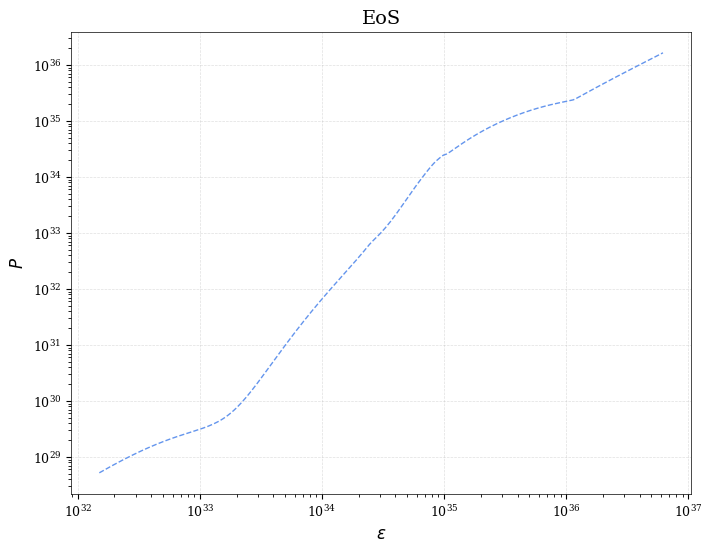

In [575]:
plt.plot(eos['energy_density'], eos['pressure'], color = 'cornflowerblue', linestyle = '--', markersize = 2)
plt.xlabel('$\epsilon$')
plt.ylabel('$P$')
plt.grid(alpha = 0.4, linestyle = '--')
plt.title('EoS')
plt.xscale('log')
plt.yscale('log')

In [576]:
eps = interp1d(eos['pressure'], eos['energy_density'], 'cubic')
press = interp1d(eos['energy_density'], eos['pressure'], kind='cubic')

In [577]:
TOV_PARAMS = {"minP": np.min(eos['pressure']), "maxP": np.max(eos['pressure']), "minE": np.min(eos['energy_density']), "maxE": np.max(eos['energy_density'])}

In [578]:
def tov(y, r):
    P, m = y
    
    if P < TOV_PARAMS['minP'] or P > TOV_PARAMS['maxP']:
        return [0,0]
    
    edens = eps(P)
    dp_dr = (-G * ( (edens + P) / c**2) * (m + 4*np.pi*(r** 3)* P / c**2) ) / (r * (r - 2*G*m/c**2))
    dm_dr = 4*np.pi*(r**2)*edens / c**2
    
    return [dp_dr, dm_dr]

In [565]:
def solve_tov(e_c, r_max = 3e5, dmrel=10e-12, dr=10):

    r = np.arange(dr, r_max + dr, dr)

    P = press(e_c)
    edens = eps(P)
    m = 4.0 * np.pi * (r[0] ** 2) * edens / c**2

    psol = odeint(tov, [P, m], r, rtol = 1e-5)

    p_R, m_R = psol[:,0], psol[:,1]

    # find the boundary of the star by finding point
    # where the mass stops to increase

    diff = (m_R[1:] - m_R[:-1])/m_R[1:]
    ind = -1
    for i, dm in enumerate(diff):
        if dm < dmrel and m_R[i] != 0:
            ind = i
            break

    M = m_R[ind - 1]
    R = r[ind - 1]

    r   = r[:ind]
    p_R = p_R[:ind]
    m_R = m_R[:ind]
    
    e_R = eps(p_R)
    
    return R / 1e3, M / Msun, (r, e_R, p_R, m_R)

In [584]:
r = np.arange(10, 30e3, 10)

P = press(1e34)
edens = eps(P)
m = 4.0 * np.pi * (r[0] ** 3) * edens / c**2
print(m/Msun)

psol = odeint(tov, [P, m], r, rtol = 1e-5)

7.031736094064653e-10


In [586]:
p_R, m_R = psol[:,0], psol[:,1]

0.07935169351686729

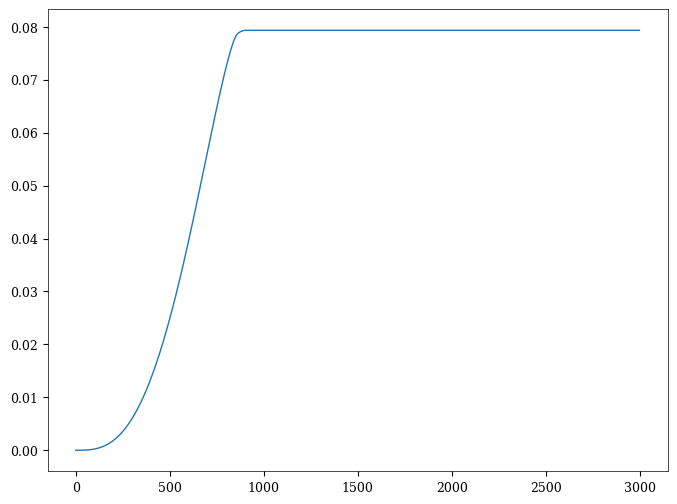

In [590]:
plt.plot(m_R/Msun)

In [566]:
o1, o2, o3 = solve_tov(1e36)

In [567]:
o1, o2

(10.24, 1.908952160968113)

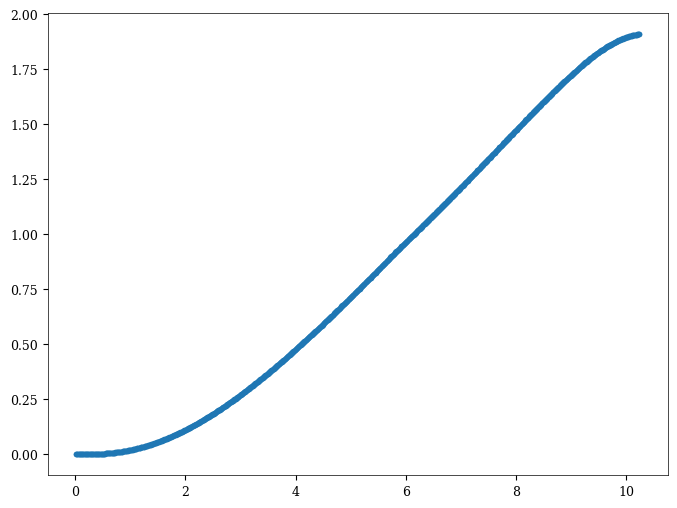

In [568]:
plt.plot(o3[0]/1e3, o3[-1]/Msun, marker = 'o')

In [569]:
m_arr = []
R_arr = []
dc = []

for dens_c in (np.linspace(2, 1000, 350)*u.MeV/u.fm**3).decompose().value:
    try:
        R, M, prof = solve_tov(dens_c, r_max=5e5, dr=10)
        m_arr.append(M)
        R_arr.append(R)
        dc.append(dens_c)
    except:
        pass

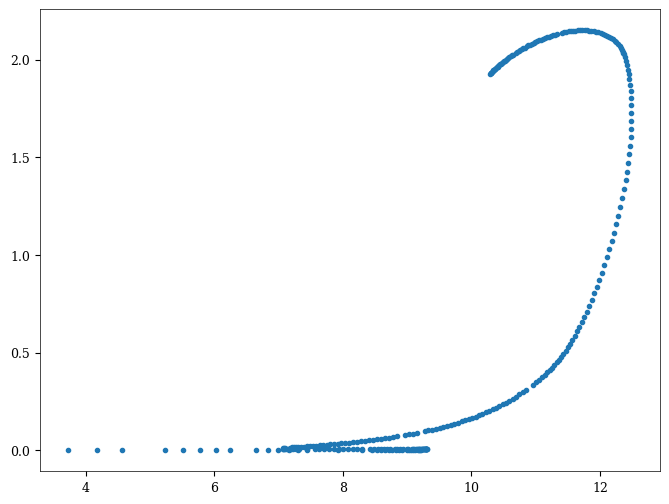

In [602]:
plt.scatter(R_arr, m_arr)

In [435]:
eos['energy_density'] = eos['energy_density']*u.MeV/u.fm**3

In [436]:
eos['pressure'] = eos['pressure']*u.MeV/u.fm**3

In [447]:
(eos['energy_density'].to_numpy()*u.MeV/u.fm**3).decompose()

<Quantity [1.50299869e+32, 1.57819913e+32, 1.65710559e+32, 1.73999126e+32,
           1.82702309e+32, 1.91840849e+32, 2.01436511e+32, 2.11512181e+32,
           2.22091860e+32, 2.33200737e+32, 2.44865322e+32, 2.57113369e+32,
           2.69974106e+32, 2.83478153e+32, 2.97657695e+32, 3.12546493e+32,
           3.28180048e+32, 3.44595587e+32, 3.61832239e+32, 3.79931047e+32,
           3.98935159e+32, 4.18889816e+32, 4.39842582e+32, 4.61843353e+32,
           4.84944537e+32, 5.09201167e+32, 5.34671023e+32, 5.61414762e+32,
           5.89496080e+32, 6.18981900e+32, 6.49942420e+32, 6.82451401e+32,
           7.16586246e+32, 7.52428257e+32, 7.90062825e+32, 8.29579572e+32,
           8.71072643e+32, 9.14640847e+32, 9.60387963e+32, 1.00842301e+33,
           1.05886034e+33, 1.11182019e+33, 1.16742870e+33, 1.22581838e+33,
           1.28712842e+33, 1.35150489e+33, 1.41910130e+33, 1.49007879e+33,
           1.56460667e+33, 1.64286264e+33, 1.72503347e+33, 1.81131525e+33,
           1.90191392e+33

In [397]:
P = press(200)*u.MeV/u.fm**3
edens = eps(P)*u.MeV/u.fm**3

In [398]:
r = 1*u.km
m = (4.0 * np.pi * (r ** 3) * edens/c **2)

In [399]:
edens + P

<Quantity 207.1416332 MeV / fm3>

In [400]:
(G * ( (edens + P) / c**2) * (m + 4*np.pi*(r** 3)* P / c**2))

<Quantity 4.45520373e-39 km3 MeV2 s2 / (kg m fm6)>

In [358]:
r - 2*G*m/c**2

<Quantity 0.99334568 km>

In [402]:
((-G * ( (edens + P) / c**2) * (m + 4*np.pi*(r** 3)* P / c**2)) / (r * (r - 2*G*m/c**2))).decompose()

<Quantity -1.15129852e+29 kg / (m2 s2)>

In [416]:
(4*np.pi*(r**2)*edens/c**2).decompose()

<Quantity 4.48032112e+24 kg / m>

In [411]:
(-(G/c**2)*((P + edens) * (m + 4*np.pi*r**3*P/c**2))/(r * (r - 2*G*m/c**2))).to(u.MeV/u.fm**4)

<Quantity -7.18584017e-19 MeV / fm4>

In [591]:
from scipy.interpolate import interp1d
from scipy.integrate import odeint
from scipy.optimize import root
import matplotlib.pyplot as plt
import pkg_resources

import numpy as np

import math

G  = 6.6730831e-8
c  = 2.99792458e10
MeV_fm3_to_pa = 1.6021766e35
c_km = 2.99792458e5 # km/s
mN = 1.67e-24 # g
mev_to_ergs = 1.602176565e-6
fm_to_cm = 1.0e-13
ergs_to_mev = 1.0/mev_to_ergs
cm_to_fm = 1.0/fm_to_cm
Msun = 1.988435e33
MeV_fm3_to_pa_cgs = 1.6021766e33
km_to_mSun = G/c**2

hbarc3 = 197.32700288295746**3

nucleon_mass = 938.04

pi = math.pi

class TOV:
  """
  Instance of the TOV solver
  """
  def __init__(self, en_arr, p_arr, add_crust=True, plot_eos=False):
    """
    Initializes TOVsolver, EOS should be provided by passing pressure (p_arr)
    as function of energy density (en_arr). p_arr and en_arr are given in nuclear
    units (MeV/fm^3). By default adds nuclear crust from:
    G. Baym, C. Pethick and P. Sutherland,
    ``The Ground state of matter at high densities: Equation of state and stellar models,''
    Astrophys. J. \textbf{170}, 299-317 (1971), doi:10.1086/151216.

    Parameters
    ----------
    en_arr : array_like, MeV / fm^3
             Array with range of energy densities of provides EOS, 
             should be provided in MeV/fm^3.
    p_arr  : array_like, MeV / fm^3
             Array with pressure as fucntion of en_arr,
             should be provided in MeV/fm^3.
    add_crust : bool, optional
             Merge EOS with crust EOS from nuclear statistical equilibrium.
    plot_eos  : bool, optional
             Output a plot with the EOS, optional.

    Returns
    -------
    solver : TOV
             Instance of tovsolver.
    """

    en_arr *= MeV_fm3_to_pa_cgs / c**2
    p_arr  *= MeV_fm3_to_pa_cgs

    sort_ind = np.argsort(p_arr)
    self.en_dens = interp1d(p_arr[sort_ind], en_arr[sort_ind], kind='cubic')

    sort_ind = np.argsort(en_arr)
    self.press = interp1d(en_arr[sort_ind], p_arr[sort_ind], kind='cubic')

    self.__en_arr = en_arr
    self.__p_arr = p_arr

    self.min_dens = np.min(en_arr)
    self.max_dens = np.max(en_arr)

    self.min_p = np.min(p_arr)
    self.max_p = np.max(p_arr)

    if add_crust:
      if(plot_eos):
        plt.plot(self.__en_arr / (MeV_fm3_to_pa_cgs / c**2),
                 self.__p_arr/MeV_fm3_to_pa_cgs ,
                 linestyle='-', label='original EOS')
      self.add_crust()
    if(plot_eos):
      plt.plot(self.__en_arr / (MeV_fm3_to_pa_cgs / c**2), 
               self.__p_arr/MeV_fm3_to_pa_cgs,
               linestyle='--', label='EOS with crust')

      plt.xscale('log')
      plt.yscale('log')
      plt.xlabel(r'${\rm \varepsilon~(MeV/fm^{3}) }$')
      plt.ylabel(r'${\rm P~(MeV/fm^{3}) }$')
      plt.legend()
      plt.show()

  def add_crust(self):
    """
    Adds Nuclear Statistical Equilibrium crust EOS from:
    G. Baym, C. Pethick and P. Sutherland,
    ``The Ground state of matter at high densities: Equation of state and stellar models,''
    Astrophys. J. \textbf{170}, 299-317 (1971), doi:10.1086/151216.
    Finds an intersection point between provided EOS and NSE EOS, then the two EOS are merged,
    so at lower densities crust EOS is used and at higher -- the provided one.

    Parameters
    ----------

    Returns
    -------
    """
    crust_loc = pkg_resources.resource_filename(__name__, 'data/')
    # dir_name = os.path.dirname(__file__)
    
    baym_eos = np.genfromtxt(crust_loc + "Baym_eos.dat", 
                         dtype=float, skip_header=1,
                         names=["en", "p", "nB",])

    P_crust = interp1d(baym_eos["en"], baym_eos["p"], kind = 'cubic')

    def eq_glue(n):
      return P_crust(n) - self.press(n)

    g = root(eq_glue, [44.*(MeV_fm3_to_pa_cgs / c**2)], options = {'maxfev' : 200})

    n_glue = g['x'][0]
    
    en_arr = []
    p_arr = []

    for i in range(len(baym_eos["p"])):
        if baym_eos["en"][i] < n_glue:
            en_arr.append(baym_eos["en"][i])
            p_arr.append(baym_eos["p"][i])
        else:
            break

    glue_ind = i

    for i in range(len(self.__p_arr)):
        if self.__en_arr[i] >= n_glue:
            en_arr.append(self.__en_arr[i])
            p_arr.append(self.__p_arr[i])

    en_arr = np.array(en_arr)
    p_arr = np.array(p_arr)

    self.min_dens = min(en_arr)
    self.min_p = min(p_arr)

    self.en_dens = interp1d(p_arr, en_arr, kind='cubic')
    self.press = interp1d(en_arr, p_arr, kind='cubic')

    self.__en_arr = en_arr
    self.__p_arr  = p_arr

    return

  def dedp(self, r, R_dep):
    e_R, p_R, m_R = R_dep

    p = p_R(r)
    dp = p * 0.005

    el_3 = self.en_dens(p - 3 * dp)
    el_2 = self.en_dens(p - 2 * dp)
    el_1 = self.en_dens(p - 1 * dp)
    er_3 = self.en_dens(p + 3 * dp)
    er_2 = self.en_dens(p + 2 * dp)
    er_1 = self.en_dens(p + 1 * dp)
    de_dp = (-1 / 60 * el_3 + 3 / 20 * el_2 - 3 / 4 * el_1 + 3 / 4 * er_1 - 3 / 20 * er_2 + 1 / 60 * er_3) / dp

    return de_dp

  def love_eq(self, param, r, R_dep):
    beta, H = param
    e_R, p_R, m_R = R_dep

    try:
      dummy = p_R(r)
    except ValueError:
      return [100000, 100000]

    de_dp = self.dedp(r, R_dep)

    dbetadr = H * (-2 * pi * G / c ** 2 * (
        5 * e_R(r) + 9 * p_R(r) / c ** 2 + de_dp * c ** 2 * (e_R(r) + p_R(r) / c ** 2)) \
                   + 3 / r ** 2 \
                   + 2 * (1 - 2 * m_R(r) / r * km_to_mSun) ** (-1) * (
                       m_R(r) / r ** 2 * km_to_mSun + G / c ** 4 * 4 * pi * r * p_R(r)) ** 2) \
              + beta / r * (
                  -1 + m_R(r) / r * km_to_mSun + 2 * pi * r ** 2 * G / c ** 2 * (e_R(r) - p_R(r) / c ** 2))
    dbetadr *= 2 * (1 - 2 * m_R(r) / r * km_to_mSun) ** (-1)

    dHdr = beta
    return [dbetadr, dHdr]

  def tov_eq(self, y, r):
    P, m = y

    if P < self.min_p or P > self.max_p:
      return [0., 0.]

    eden = self.en_dens(P)

    dPdr = -G * (eden + P / c ** 2) * (m + 4.0 * pi * r ** 3 * P / c ** 2)
    dPdr = dPdr / (r * (r - 2.0 * G * m / c ** 2))

    dmdr = 4.0 * pi * r ** 2 * eden

    return [dPdr, dmdr]

  def check_density(self, dens):
    if dens < self.min_dens or dens > self.max_dens:
      raise Exception('Central density: %8.4E is outside of the EoS range. \n' 
                        %(dens/(MeV_fm3_to_pa_cgs / c ** 2)) +
                        'min density is: %8.4E, max density is:%8.4E'
                         %(self.min_dens/(MeV_fm3_to_pa_cgs / c ** 2), 
                         self.max_dens/(MeV_fm3_to_pa_cgs / c ** 2)))



  def solve(self, c_dens, rmax=30e5, rtol=1.0e-5, dmrel=10e-12, dr=100):
    """
    Solves TOV equation for neutron star with given central density c_dens.

    Parameters
    ----------
    c_dens : float, MeV / fm^3
    rmax : float, cm, optional
      Maximal distance from the star center along which star profile is calculated.
      If rmax is smaller then actual radius of the star, then Mass and Radius 
      will be calculated wrong.
    rtol : float, optional
      Relative accuracy of ODE solver.
    dmrel : float, optional
      Relative mass increase by which star boundary is estimated. 
    dr : float, cm, optinal
      Stepsize for ODE solver.

    Returns
    -------
    R : float, km
      Calculated radius of the star.
    M : float, Msun
      Calculated mass of the star.
    tuple (r, e_R, p_R, m_R) :
      Neutron star profile.
      r : numpy.array, cm
        Array of points along which profile is calculated.
      e_R : numpy.array
        Energy density of the star along r.
      p_R : numpy.array
        Pressure of the star along r.
      m_R : numpy.array
        Integrated mass of the star along r.
    """
    c_dens *= MeV_fm3_to_pa_cgs / c ** 2

    self.check_density(c_dens)

    r = np.arange(dr, rmax + dr, dr)

    P = self.press(c_dens)
    eden = self.en_dens(P)
    m = 4.0 * pi * r[0] ** 3 * eden

    psol = odeint(self.tov_eq, [P, m], r, rtol=rtol)

    p_R, m_R = psol[:,0], psol[:,1]

    # find the boundary of the star by finding point
    # where the mass stops to increase

    diff = (m_R[1:] - m_R[:-1])/m_R[1:]
    ind = -1
    for i, dm in enumerate(diff):
      if dm < dmrel and m_R[i] != 0:
        ind = i
        break

    M = m_R[ind - 1]
    R = r[ind - 1]

    r   = r[:ind]
    p_R = p_R[:ind]
    m_R = m_R[:ind]
    
    e_R = self.en_dens(p_R)
    
    return R / 1e5, M / Msun, (r, e_R, p_R, m_R)

  def solve_tidal(self, c_dens, rmax=30e5, rtol=1.0e-4, dmrel=10e-12, dr=100):
    """
    Solves TOV equation and calculates tidal properties 
    for neutron star with given central density c_dens.

    Parameters
    ----------
    c_dens : float, MeV / fm^3
    rmax : float, cm, optional
      Maximal distance from the star center along which star profile is calculated.
      If rmax is smaller then actual radius of the star, then Mass and Radius 
      will be calculated wrong.
    rtol : float, optional
      Relative accuracy of ODE solver.
    dmrel : float, optional
      Relative mass increase by which star boundary is estimated. 
    dr : float, cm, optinal
      Stepsize for ODE solver.

    Returns
    -------
    [R, M, C, k2, y, beta, H], float array_like:
      R : float, km
        Calculated radius of the star.
      M : float, Msun
        Calculated mass of the star.
      C : float, unitless
        Compactness.
      k2 : float, unitless
        Second Love number.
      y : float, unitless
      beta : float, unitless
      H : float, unitless
    """
    R, M, R_dep  = self.solve(c_dens, rmax=rmax, rtol=rtol, dmrel=dmrel, dr=dr)
    r, e_R, p_R, m_R = R_dep

    R *= 1e5
    M *= Msun

    e_R = interp1d(r, e_R, kind='cubic')
    p_R = interp1d(r, p_R, kind='cubic')
    m_R = interp1d(r, m_R, kind='cubic')

    beta0 = 2 * r[0]
    H0 = r[0] ** 2

    solution = odeint(self.love_eq, [beta0, H0], r, args=([e_R, p_R, m_R],), rtol=rtol)

    beta = solution[-1, 0]
    H = solution[-1, 1]

    y = R * beta / H

    C = compactness = M / R * km_to_mSun

    k2 = 8 / 5 * C ** 5 * (1 - 2 * C) ** 2 * (2 + 2 * C * (y - 1) - y) * (
          2 * C * (6 - 3 * y + 3 * C * (5 * y - 8)) + 4 * C ** 3 * (
            13 - 11 * y + C * (3 * y - 2) + 2 * C ** 2 * (1 + y)) + 3 * (1 - 2 * C) ** 2 * (2 - y + 2 * C * (y - 1)) * (
            np.log(1 - 2 * C))) ** (-1)

    return np.array([R / 1e5, M / Msun, C, k2, y, beta, H])

In [594]:
eos = np.genfromtxt("example_eos.dat", names=True)

In [595]:
n_arr, p_arr = eos["energy_density"], eos["pressure"]

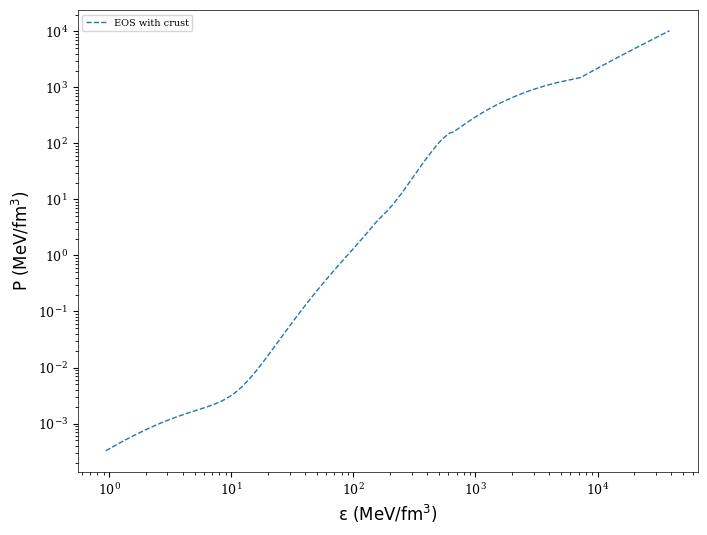

In [596]:
tov_s = TOV(n_arr, p_arr, plot_eos=True, add_crust = False)

In [600]:
m_arr = []
R_arr = []

for dens_c in np.logspace(-0,3.7,350):
    try:
        R, M, prof = tov_s.solve(dens_c, rmax=50e5, dr=100)
        m_arr.append(M)
        R_arr.append(R)
    except:
        pass

/home/aswin/anaconda3/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [599]:
np.logspace(0.2,3.7,350)

array([1.58489319e+00, 1.62191710e+00, 1.65980591e+00, 1.69857982e+00,
       1.73825951e+00, 1.77886613e+00, 1.82042135e+00, 1.86294732e+00,
       1.90646671e+00, 1.95100274e+00, 1.99657916e+00, 2.04322026e+00,
       2.09095092e+00, 2.13979660e+00, 2.18978333e+00, 2.24093779e+00,
       2.29328723e+00, 2.34685958e+00, 2.40168342e+00, 2.45778796e+00,
       2.51520314e+00, 2.57395956e+00, 2.63408856e+00, 2.69562221e+00,
       2.75859331e+00, 2.82303545e+00, 2.88898300e+00, 2.95647111e+00,
       3.02553577e+00, 3.09621383e+00, 3.16854295e+00, 3.24256173e+00,
       3.31830962e+00, 3.39582701e+00, 3.47515526e+00, 3.55633665e+00,
       3.63941448e+00, 3.72443305e+00, 3.81143770e+00, 3.90047482e+00,
       3.99159189e+00, 4.08483751e+00, 4.18026139e+00, 4.27791441e+00,
       4.37784867e+00, 4.48011744e+00, 4.58477526e+00, 4.69187793e+00,
       4.80148259e+00, 4.91364766e+00, 5.02843296e+00, 5.14589971e+00,
       5.26611054e+00, 5.38912956e+00, 5.51502236e+00, 5.64385609e+00,
      